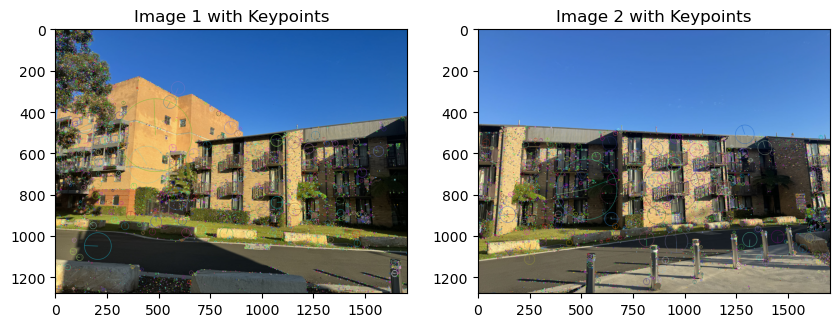

In [1]:
#Task 1
# (a)
import cv2
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('./1.jpg')
image2 = cv2.imread('./2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Draw keypoints on the images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Keypoints')
plt.show()


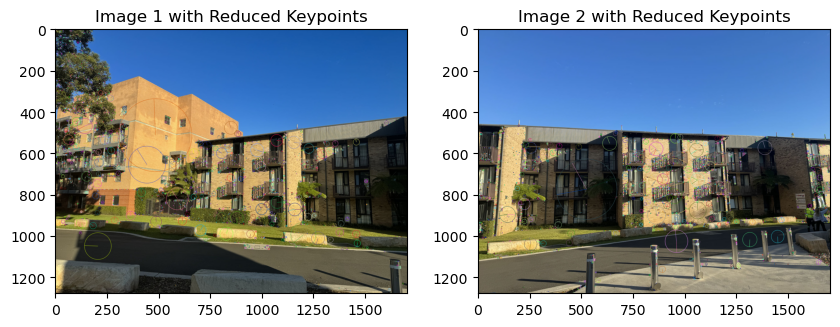

In [2]:
# (b)
#To reduce the number of keypoints, we increase the contrastThreshold parameter of the SIFT_create method. 
#This parameter controls the contrast threshold used to filter out weak features.
# Reduce the number of keypoints by setting a higher contrastThreshold
sift_reduced = cv2.SIFT_create(contrastThreshold=0.1)

# Detect keypoints and descriptors with the reduced SIFT
keypoints1_reduced, descriptors1_reduced = sift_reduced.detectAndCompute(gray1, None)
keypoints2_reduced, descriptors2_reduced = sift_reduced.detectAndCompute(gray2, None)

# Draw the reduced keypoints on the images
image1_with_reduced_keypoints = cv2.drawKeypoints(image1, keypoints1_reduced, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_with_reduced_keypoints = cv2.drawKeypoints(image2, keypoints2_reduced, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with reduced keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_reduced_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Reduced Keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_reduced_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Reduced Keypoints')
plt.show()


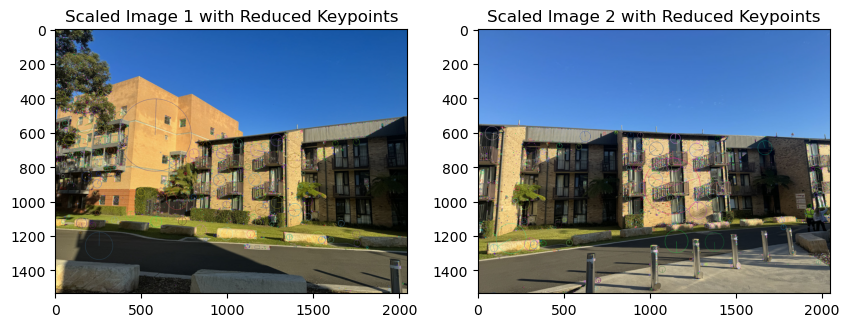

In [4]:
# Task2
#(a)
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

# Function to scale an image by a given factor
def scale_image(image, scale_factor):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dimensions = (width, height)
    return cv2.resize(image, dimensions, interpolation = cv2.INTER_LINEAR)

# Load images
image1 = cv2.imread('./1.jpg')
image2 = cv2.imread('./2.jpg')

# Scale images
scaled_image1 = scale_image(image1, 1.2)
scaled_image2 = scale_image(image2, 1.2)

# Convert to grayscale
gray_scaled_image1 = cv2.cvtColor(scaled_image1, cv2.COLOR_BGR2GRAY)
gray_scaled_image2 = cv2.cvtColor(scaled_image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector with reduced number of keypoints
sift_reduced = cv2.SIFT_create(contrastThreshold=0.1)

# Detect keypoints and descriptors
keypoints1_scaled, descriptors1_scaled = sift_reduced.detectAndCompute(gray_scaled_image1, None)
keypoints2_scaled, descriptors2_scaled = sift_reduced.detectAndCompute(gray_scaled_image2, None)

# Draw keypoints on the images
scaled_image1_with_keypoints = cv2.drawKeypoints(scaled_image1, keypoints1_scaled, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scaled_image2_with_keypoints = cv2.drawKeypoints(scaled_image2, keypoints2_scaled, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(scaled_image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image 1 with Reduced Keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scaled_image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image 2 with Reduced Keypoints')
plt.show()


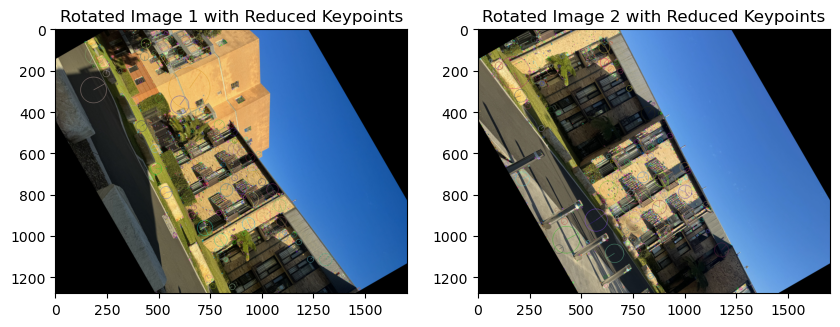

In [5]:
# (b)
# Function to rotate an image by a given angle
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

# Rotate images
rotated_image1 = rotate_image(image1, -60)  # Negative angle for clockwise rotation
rotated_image2 = rotate_image(image2, -60)

# Convert to grayscale
gray_rotated_image1 = cv2.cvtColor(rotated_image1, cv2.COLOR_BGR2GRAY)
gray_rotated_image2 = cv2.cvtColor(rotated_image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors
keypoints1_rotated, descriptors1_rotated = sift_reduced.detectAndCompute(gray_rotated_image1, None)
keypoints2_rotated, descriptors2_rotated = sift_reduced.detectAndCompute(gray_rotated_image2, None)

# Draw keypoints on the images
rotated_image1_with_keypoints = cv2.drawKeypoints(rotated_image1, keypoints1_rotated, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
rotated_image2_with_keypoints = cv2.drawKeypoints(rotated_image2, keypoints2_rotated, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(rotated_image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image 1 with Reduced Keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image 2 with Reduced Keypoints')
plt.show()


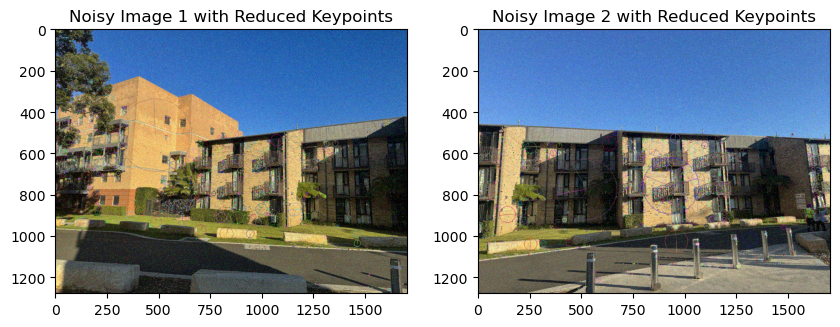

In [6]:
# (c)
# Function to add salt and pepper noise to an image
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy_image = random_noise(image, mode='s&p', amount=amount)
    noisy_image = np.array(255*noisy_image, dtype = 'uint8')
    return noisy_image

# Add salt and pepper noise to images
noisy_image1 = add_salt_and_pepper_noise(image1)
noisy_image2 = add_salt_and_pepper_noise(image2)

# Convert to grayscale
gray_noisy_image1 = cv2.cvtColor(noisy_image1, cv2.COLOR_BGR2GRAY)
gray_noisy_image2 = cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and descriptors
keypoints1_noisy, descriptors1_noisy = sift_reduced.detectAndCompute(gray_noisy_image1, None)
keypoints2_noisy, descriptors2_noisy = sift_reduced.detectAndCompute(gray_noisy_image2, None)

# Draw keypoints on the images
noisy_image1_with_keypoints = cv2.drawKeypoints(noisy_image1, keypoints1_noisy, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
noisy_image2_with_keypoints = cv2.drawKeypoints(noisy_image2, keypoints2_noisy, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(noisy_image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image 1 with Reduced Keypoints')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Noisy Image 2 with Reduced Keypoints')
plt.show()


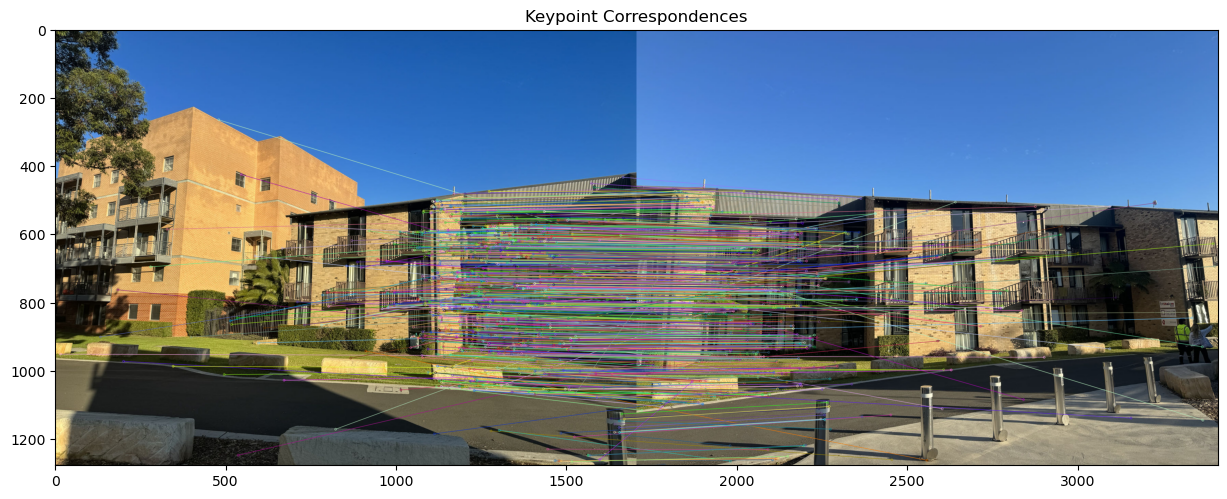

In [2]:
# Task3
# (a)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread('./1.jpg')
image2 = cv2.imread('./2.jpg')

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to select good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title('Keypoint Correspondences')
plt.show()


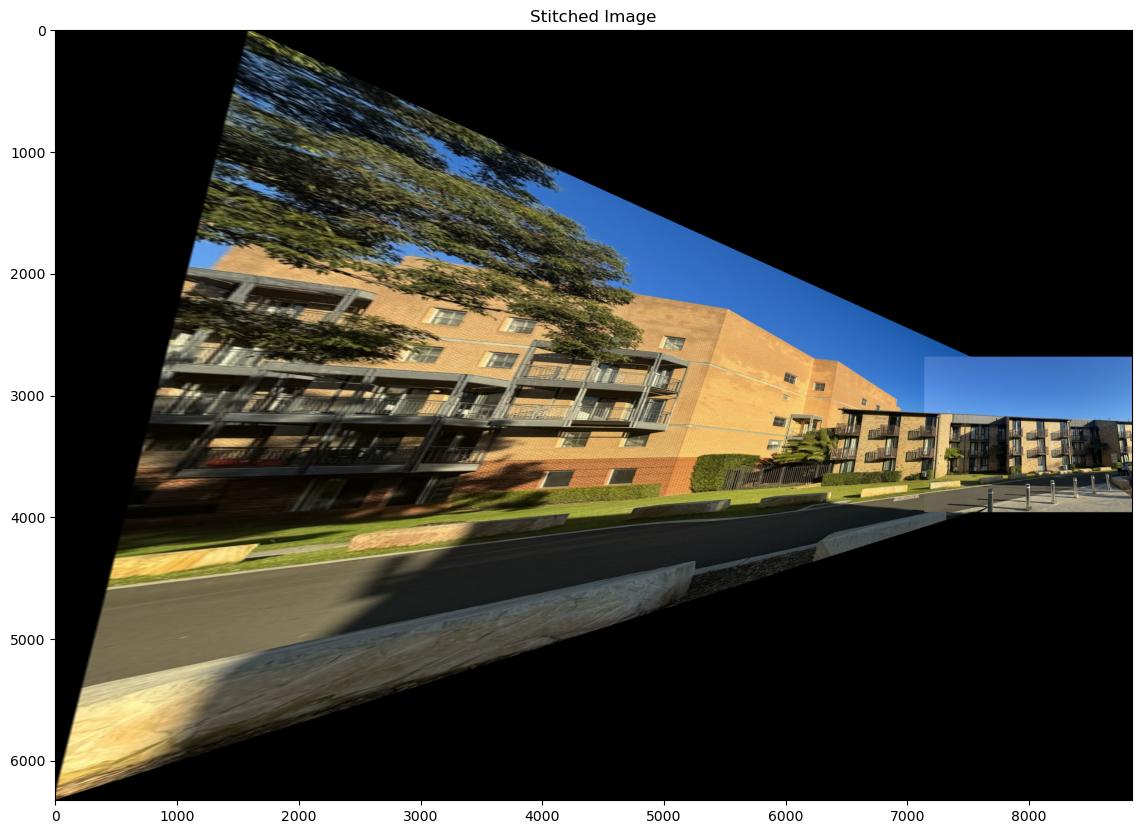

In [3]:
# (b)
# Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

# Find homography using RANSAC
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp image1 to the perspective of image2
height1, width1 = image1.shape[:2]
height2, width2 = image2.shape[:2]

# Corners of image1
corners_image1 = np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2)

# Transform the corners of image1 using the homography
transformed_corners_image1 = cv2.perspectiveTransform(corners_image1, H)

# Determine the size of the output image
all_corners = np.concatenate((transformed_corners_image1, np.float32([[0, 0], [0, height2], [width2, height2], [width2, 0]]).reshape(-1, 1, 2)), axis=0)
[x_min, y_min] = np.int32(all_corners.min(axis=0).ravel())
[x_max, y_max] = np.int32(all_corners.max(axis=0).ravel())

translation_dist = [-x_min, -y_min]

# Create the translation matrix
H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

# Warp images with the translation
result = cv2.warpPerspective(image1, H_translation.dot(H), (x_max-x_min, y_max-y_min))
result[translation_dist[1]:height2+translation_dist[1], translation_dist[0]:width2+translation_dist[0]] = image2

# Display the final stitched image
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Stitched Image')
plt.show()
